In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from  keras.layers import   Activation
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from matplotlib import pyplot
from matplotlib.pyplot import imshow

In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()
path = "/content/gdrive/MyDrive/Tires_Dataset_For_You_Bro"
files = os.listdir(path)
print(os.listdir(path))

['train', 'test', 'validation', '.ipynb_checkpoints']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(path+'/train',
                                                 target_size = (180, 180),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(path+'/validation',
                                                 target_size = (180, 180),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(path+'/test',
                                            target_size = (180, 180),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
# Assuming training_set has been defined as shown previously
X_batch, y_batch = next(training_set)

# Check the shapes of the batches
print("X_batch shape:", X_batch.shape)  # Should be (32, 64, 64, 3)
print("y_batch shape:", y_batch.shape)  # Should be (32,)

X_batch shape: (32, 180, 180, 3)
y_batch shape: (32,)


In [ ]:
print(training_set.class_indices)
class_names = list(training_set.class_indices.keys())
print(class_names)

{'defective': 0, 'good': 1}
['defective', 'good']


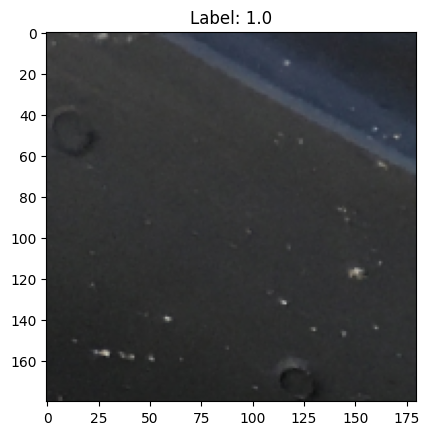

In [ ]:
X_train_batch, y_train_batch = next(training_set)

# Select the image you want to display (e.g., the first image in the batch)
image_to_display = X_train_batch[0]  # Change index if you want a different image

# Display the image
plt.imshow(image_to_display)
plt.axis('on')  # show axes
plt.title(f'Label: {y_train_batch[0]}')  # Display the corresponding label
plt.show()

(180, 180, 3)


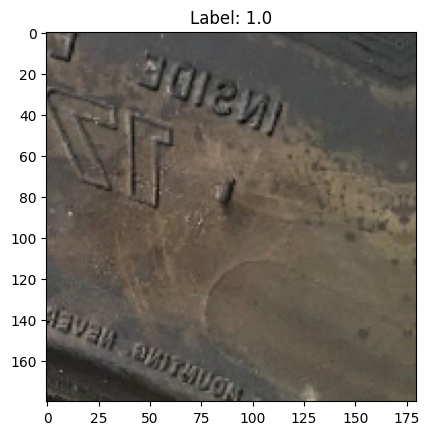

In [ ]:
X_train_batch, y_train_batch = next(training_set)

# Select the image you want to display (e.g., the first image in the batch)
image_to_display = X_train_batch[0]  # Change index if you want a different image
print(image_to_display.shape)
# Display the image
plt.imshow(image_to_display)
plt.axis('on')  # show axes
plt.title(f'Label: {y_train_batch[0]}')  # Display the corresponding label
plt.show()

In [ ]:
from keras.layers import BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(100, activation='softmax'))

model.summary()

# Fit the model
# Replace `train_data` and `val_data` with your actual data
# model.fit(train_data, train_labels, validation_data=(val_data, val_labels), ccu
#           epochs=50, callbacks=[reduce_lr, early_stopping])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      30,294,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,379,713 (115.89 MB)

 Trainable params: 30,379,713 (115.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.5,
    min_lr=0.00001,  # Ensure it doesn't go below this
    verbose=1
)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
from  keras.optimizers import Adam

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
    training_set,
    epochs=epochs,
    validation_data=val_set,
    callbacks=[early_stopping,learning_rate_reduction]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 746s 15s/step - accuracy: 0.5754 - loss: 0.8318 - val_accuracy: 0.6433 - val_loss: 0.7704 - learning_rate: 0.0010
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7279 - loss: 0.5571 - val_accuracy: 0.6667 - val_loss: 0.6819 - learning_rate: 0.0010
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7520 - loss: 0.5063 - val_accuracy: 0.6633 - val_loss: 0.7820 - learning_rate: 0.0010
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7941 - loss: 0.4890 - val_accuracy: 0.6233 - val_loss: 0.9007 - learning_rate: 0.0010
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7679 - loss: 0.5100 - val_accuracy: 0.6667 - val_loss: 0.7779 - learning_rate: 0.0010
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7986 - loss: 0.4549 - val_accuracy: 0.6567 - val_loss: 0.9660 - learning_rate: 0.0010
Epoch 7/20
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.7783 - loss: 0.5136
Epoch 7: ReduceLROnPlat

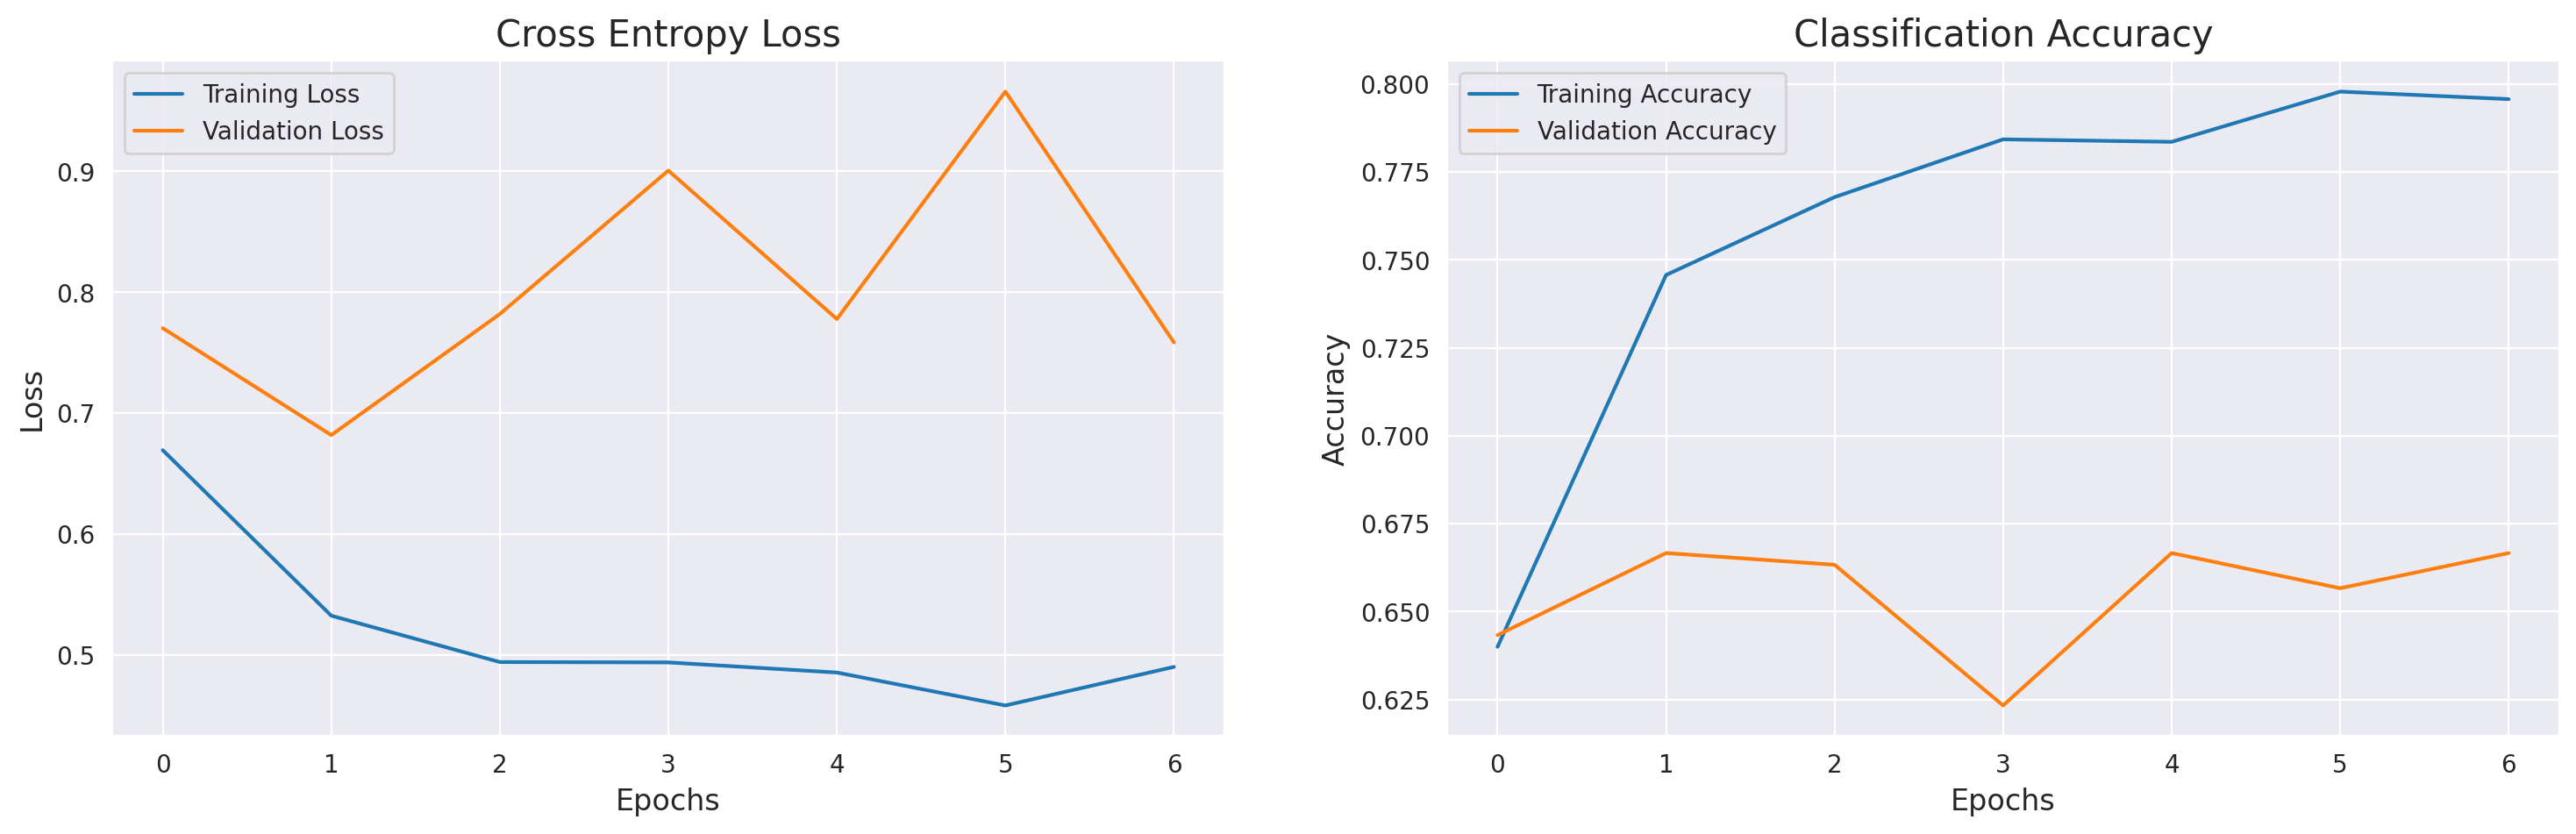

In [ ]:
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming history.history is available as a dictionary containing the keys:
# 'loss', 'val_loss', 'accuracy', 'val_accuracy'
error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5), dpi=200)
sns.set_style('darkgrid')

# Plot for Cross Entropy Loss
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'], label='Training Loss')
plt.plot(error['val_loss'], label='Validation Loss')
plt.legend()  # Adding the legend

# Plot for Classification Accuracy
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(error['accuracy'], label="Training Accuracy")
plt.plot(error['val_accuracy'], label="Validation Accuracy")
plt.legend()  # Adding the legend

plt.show()

In [ ]:
history4 = model.fit(training_set,
                    validation_data=val_set,
                    epochs=30,  # Set appropriate number of epochs
                    callbacks=[early_stopping, learning_rate_reduction])  # Added checkpointer

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test_set
test_loss, test_accuracy = model.evaluate(val_set)  # steps = number of batches to evaluate
# Print the accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 970ms/step - accuracy: 0.6647 - loss: 0.6617
Test accuracy: 66.67%


In [ ]:
# Evaluate the model on the test_set
test_loss, test_accuracy = model.evaluate(test_set)  # steps = number of batches to evaluate
# Print the accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 112s 12s/step - accuracy: 0.5487 - loss: 0.6903
Test accuracy: 53.00%


In [ ]:
#save Model
model.save("/content/gdrive/MyDrive/Colab Notebooks/model/TiresModel.h5")

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/model/TiresModel.h5')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Confusion Matrix:
[[114  36]
 [105  45]]
Classification Report:
              precision    recall  f1-score   support

   defective       0.52      0.76      0.62       150
        good       0.56      0.30      0.39       150

    accuracy                           0.53       300
   macro avg       0.54      0.53      0.50       300
weighted avg       0.54      0.53      0.50       300



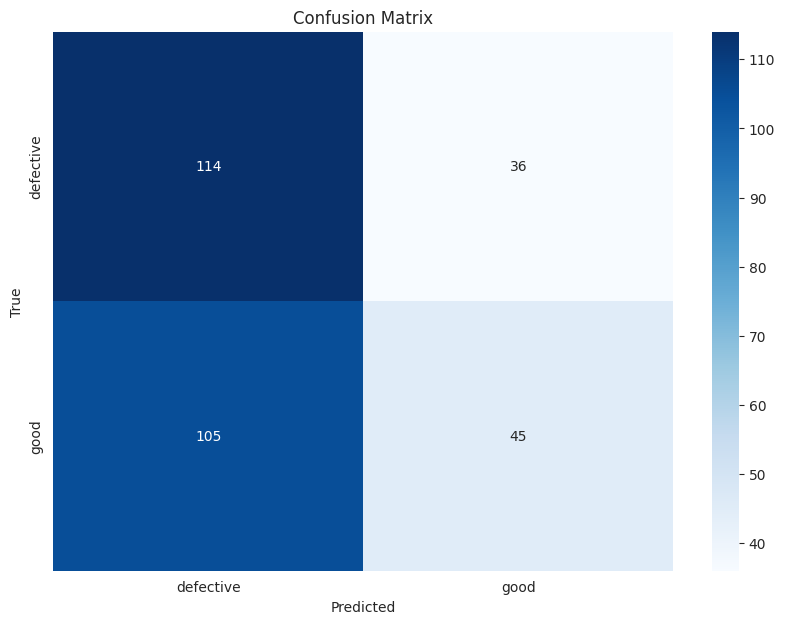

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming test_set is your ImageDataGenerator test generator
X_test, y_test = [], []

# Iterate over the generator to get all batches of data
for _ in range(len(test_set)):
    # Get the next batch of images and labels
    x_batch, y_batch = next(test_set)
    X_test.append(x_batch)
    y_test.append(y_batch)

# Concatenate all batches into a single numpy array
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

y_pred = model.predict(X_test)  # Predict directly using your fixed test set
y_pred_classes = (y_pred > 0.5).astype("int32")  # Binary classification

y_true = y_test

cm = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(cm)

# Step 5: Print the classification report
report = classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys())
print("Classification Report:")
print(report)

# Step 6: Plot the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()